In [1]:
import keras
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
import numpy as np

from matplotlib import pyplot as plt
#%matplotlib inline
MODEL = '../experiment0/results/model/modela.hdf5'



Using TensorFlow backend.


### Load the trained model

In [2]:
model = keras.models.load_model(MODEL)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0   

### We need to remove the soft max activation from the network, and replace it with linear.   Otherwise the results end up being hard to read. 

In [3]:
layer_idx = -1
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)


### Some handy plotting functions

In [4]:
def plot_layer(name, size, weight):
    
    layer_idx = utils.find_layer_idx(model, name)
    for i in np.arange(size):
        img = visualize_activation(model, layer_idx, filter_indices=i, input_range=INPUT_RANGE, verbose=False, tv_weight=weight, lp_norm_weight=weight)
        plot_one(img[..., 0], layer_idx, i, weight)

In [5]:
def plot_one_neuron(name, index, weights):
    
    layer_idx = utils.find_layer_idx(model, name)
    for w in weights:
        img = visualize_activation(model, layer_idx, filter_indices=index, input_range=INPUT_RANGE, verbose=False, tv_weight=w)
        plot_one(img[..., 0], layer_idx,index, w)

In [6]:
INPUT_RANGE = (0., 1.)
TV_WEIGHT = 10

def plot_one(image, layer_idx, filter_idx, display_number):
    """
    Plot one image with the truth and prediction printed along the bottom 
    """
   
    plt.imshow(image)
    
    # turn off the ticks along the left and bottom of the image
    plt.tick_params(
    axis='both',       # changes apply to both-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # left ticks are off
    labelleft=False,   # turn off the left tick labels
    labelbottom=False,) # labels along the bottom edge are off
    
    plt.title(f'layer={layer_idx} filter={filter_idx}')
    plt.show()
 

### Plot the first dense layer

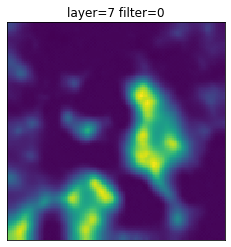

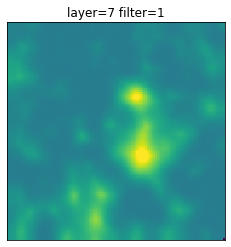

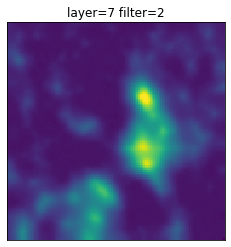

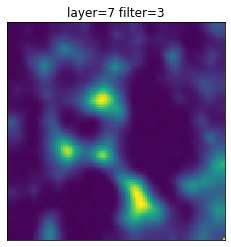

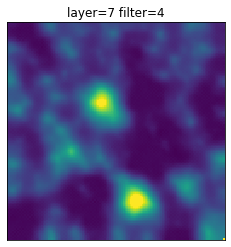

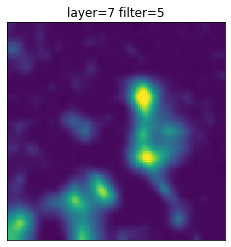

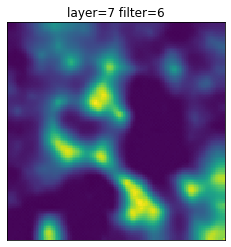

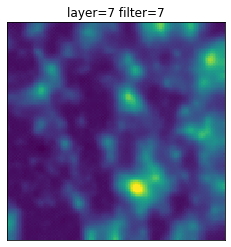

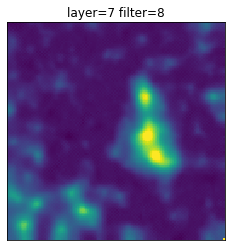

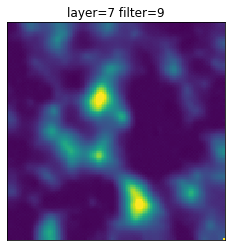

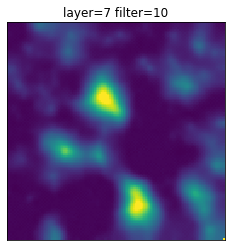

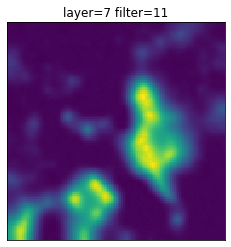

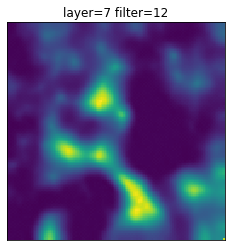

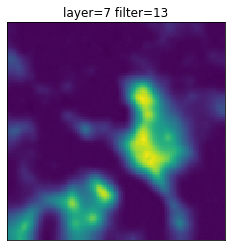

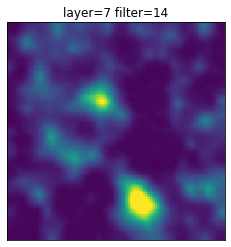

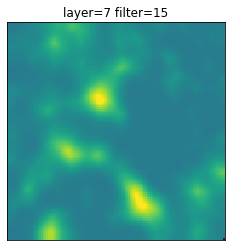

In [7]:
plot_layer('dense_1', 16, 10)

### The second dense layer

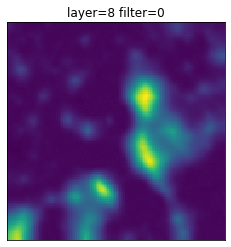

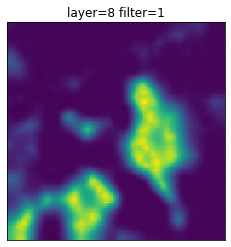

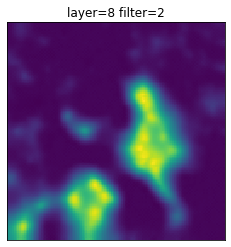

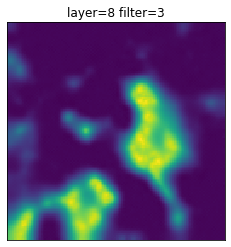

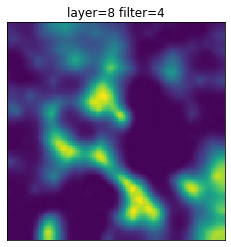

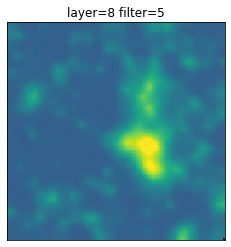

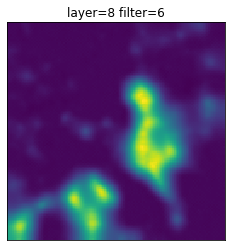

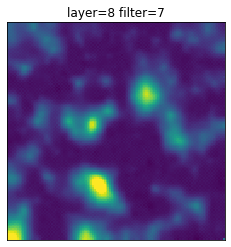

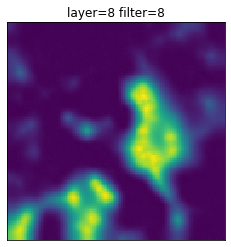

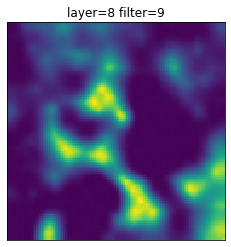

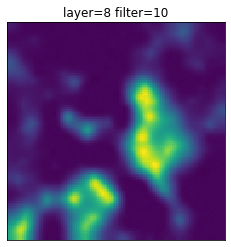

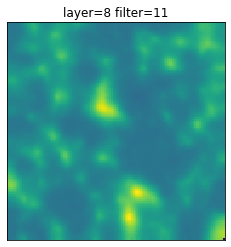

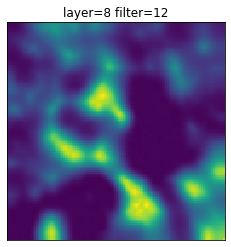

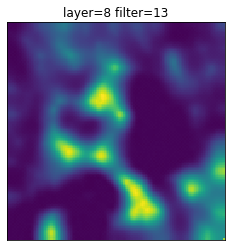

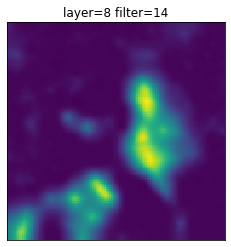

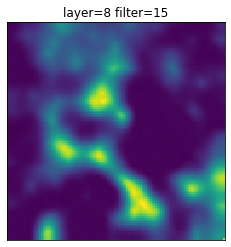

In [8]:
plot_layer('dense_2', 16, 10)